Técnicas algorítmicas

Ulises Barragan de la Cruz (200300681)

**Ejercicio Final**

**Descripción del Problema:** Desarrolla un algoritmo eficiente para resolver un Sudoku utilizando una de las técnicas algorítmicas avanzadas: programación dinámica, divide y vencerás, o algoritmos voraces. Elige la técnica que consideres más adecuada y justifica tu selección en base a la estructura del problema y la complejidad computacional esperada

**Implementación:**


Backtracking

In [1]:
import time
import matplotlib.pyplot as plt

In [2]:
def is_valid(board, row, col, num):
    """
    Verifica si el número `num` se puede colocar en la celda `board[row][col]`
    respetando las reglas del Sudoku.
    """
    # Verificar la fila
    for i in range(9):
        if board[row][i] == num:
            return False

    # Verificar la columna
    for i in range(9):
        if board[i][col] == num:
            return False

    # Verificar el subcuadrante 3x3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False

    return True


def solve_sudoku(board):
    """
    Resuelve el Sudoku
    """
    for row in range(9):
        for col in range(9):
            # Si la celda está vacía
            if board[row][col] == 0:
                # Probar los números del 1 al 9
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        # Asignar el número a la celda
                        board[row][col] = num

                        # Llamada recursiva para avanzar
                        if solve_sudoku(board):
                            return True

                        # Si no resulta en solución, deshacer la asignación
                        board[row][col] = 0

                # Si no se encontró un número válido, retroceder
                return False

    # Si no hay celdas vacías, el Sudoku está resuelto
    return True


def print_board(board):
    """
    Imprime el tablero de Sudoku
    """
    for row in board:
        print(" ".join(str(num) if num != 0 else "." for num in row))
    print()

Probaremos el código, con un tablero de Sudoku 9x9

In [11]:
# Tablero de Sudoku  (con celdas vacías representadas por 0)
sudoku_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

In [4]:
# Resolver y medir el tiempo
start_time = time.time()
if solve_sudoku(sudoku_board):
    print("Sudoku Resuelto:")
    print_board(sudoku_board)
else:
    print("No tiene solución.")
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")


Sudoku Resuelto:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9

Tiempo de ejecución: 0.1132 segundos


Se mostrara como el algoritmo resuelve el tablero, se podra apreciar como se corrigen las elecciones de números en diferentes casillas para poder resolver correctamente el Sudoku.

nota: Debido a que se imprimen los retrocesos y como se asignan los números para cada casilla, se imprimen muchos pasos, por lo que toma bastante tiempo de ejecución, pero desde los primeros pasos se nota como coloca y corrige los las celdas si es necesario.

In [9]:
import time

def print_board(board):
    """
    Imprime el tablero de Sudoku en un formato legible.
    """
    for row in board:
        print(" ".join(str(num) if num != 0 else "." for num in row))
    print("\n")

def is_valid(board, row, col, num):
    """
    Verifica si el número `num` se puede colocar en la celda `board[row][col]`
    respetando las reglas del Sudoku.
    """
    # Verificar la fila
    for i in range(9):
        if board[row][i] == num:
            return False

    # Verificar la columna
    for i in range(9):
        if board[i][col] == num:
            return False

    # Verificar el subcuadrante 3x3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False

    return True

def solve_sudoku_step_by_step(board):
    """
    Resuelve el Sudoku usando backtracking, mostrando el proceso paso a paso.
    """
    for row in range(9):
        for col in range(9):
            # Si la celda está vacía
            if board[row][col] == 0:
                # Probar los números del 1 al 9
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        # Asignar el número a la celda
                        board[row][col] = num
                        print_board(board)  # Mostrar el tablero actualizado
                        time.sleep(0.2)  # Pausa para visualizar el paso

                        # Llamada recursiva para avanzar
                        if solve_sudoku_step_by_step(board):
                            return True

                        # Si no resulta en solución, deshacer la asignación
                        board[row][col] = 0
                        print_board(board)  # Mostrar el retroceso
                        time.sleep(0.2)

                # Si no se encontró un número válido, retroceder
                return False

    # Si no hay celdas vacías, el Sudoku está resuelto
    return True

In [14]:
# Tablero de Sudoku  (con celdas vacías representadas por 0)
sudoku_board_step = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

In [15]:
# Resolver el Sudoku paso a paso
start_time = time.time()
if solve_sudoku_step_by_step(sudoku_board_step):
    print("Sudoku Resuelto:")
    print_board(sudoku_board_step)
else:
    print("No tiene solución.")
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")


5 3 1 . 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


5 3 1 2 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


5 3 1 2 7 4 . . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


5 3 1 2 7 4 8 . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


5 3 1 2 7 4 8 9 .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


5 3 1 2 7 4 8 . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9


5 3 1 2 7 4 . . 

KeyboardInterrupt: 

En esta sección probaremos Pruebas con tableros de Sudoku de diferentes dificultades

La dificultad de un Sudoku radica en varios factores relacionados con la cantidad y distribución de las pistas iniciales y en cómo estas afectan el espacio de búsqueda y las restricciones durante la resolución. Estos factores determinan cuán fácil o difícil es encontrar una solución válida.

Como se muestre en la siguiente tabla, diferentes factores afectan la complejidad del tablero:


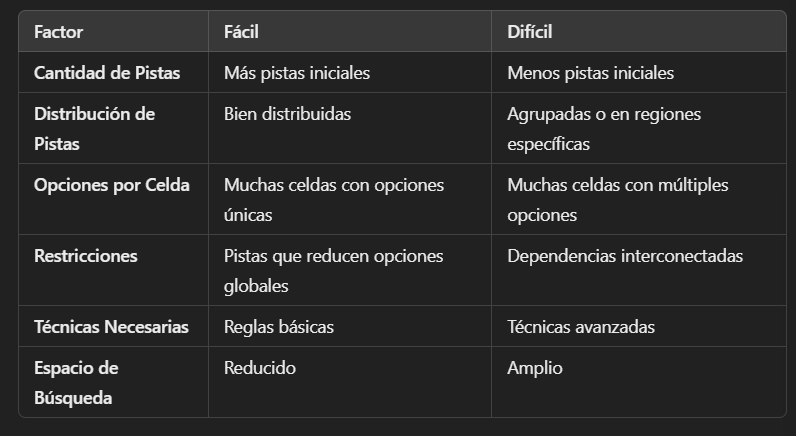

Los tableros se tomaran de la siguiente pagina: https://sudoku.com/es/dificil/

In [16]:
# Tablero fácil
easy_board = [
    [0, 0, 0, 2, 6, 0, 7, 0, 1],
    [6, 8, 0, 0, 7, 0, 0, 9, 0],
    [1, 9, 0, 0, 0, 4, 5, 0, 0],
    [8, 2, 0, 1, 0, 0, 0, 4, 0],
    [0, 0, 4, 6, 0, 2, 9, 0, 0],
    [0, 5, 0, 0, 0, 3, 0, 2, 8],
    [0, 0, 9, 3, 0, 0, 0, 7, 4],
    [0, 4, 0, 0, 5, 0, 0, 3, 6],
    [7, 0, 3, 0, 1, 8, 0, 0, 0]
]

# Tablero medio
medium_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# Tablero dificil
hard_board = [
    [8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 6, 0, 0, 0, 0, 0],
    [0, 7, 0, 0, 9, 0, 2, 0, 0],
    [0, 5, 0, 0, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 4, 5, 7, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 3, 0],
    [0, 0, 1, 0, 0, 0, 0, 6, 8],
    [0, 0, 8, 5, 0, 0, 0, 1, 0],
    [0, 9, 0, 0, 0, 0, 4, 0, 0]
]

In [17]:
# Resolver y medir el tiempo Tablero facil
start_time = time.time()
if solve_sudoku(easy_board):
    print("Sudoku Resuelto:")
    print_board(easy_board)
else:
    print("No tiene solución.")
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")

# Resolver y medir el tiempo Tablero medio
start_time = time.time()
if solve_sudoku(medium_board):
    print("Sudoku Resuelto:")
    print_board(medium_board)
else:
    print("No tiene solución.")
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")

# Resolver y medir el tiempo Tablero dificil
start_time = time.time()
if solve_sudoku(hard_board):
    print("Sudoku Resuelto:")
    print_board(hard_board)
else:
    print("No tiene solución.")
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")


Sudoku Resuelto:
4 3 5 2 6 9 7 8 1
6 8 2 5 7 1 4 9 3
1 9 7 8 3 4 5 6 2
8 2 6 1 9 5 3 4 7
3 7 4 6 8 2 9 1 5
9 5 1 7 4 3 6 2 8
5 1 9 3 2 6 8 7 4
2 4 8 9 5 7 1 3 6
7 6 3 4 1 8 2 5 9


Tiempo de ejecución: 0.0041 segundos
Sudoku Resuelto:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


Tiempo de ejecución: 0.0639 segundos
Sudoku Resuelto:
8 1 2 7 5 3 6 4 9
9 4 3 6 8 2 1 7 5
6 7 5 4 9 1 2 8 3
1 5 4 2 3 7 8 9 6
3 6 9 8 4 5 7 2 1
2 8 7 1 6 9 5 3 4
5 2 1 9 7 4 3 6 8
4 3 8 5 2 6 9 1 7
7 9 6 3 1 8 4 5 2


Tiempo de ejecución: 0.7258 segundos


Graficamos el tiempo que le tomo resolver cada tablero, esto nos sirve para demostrar que conforme aumente la dificultad, le toma mas tiempo al algoritmo resolver, pero siempre encuentra la respuesta en caso de que el Sudoku la tenga.

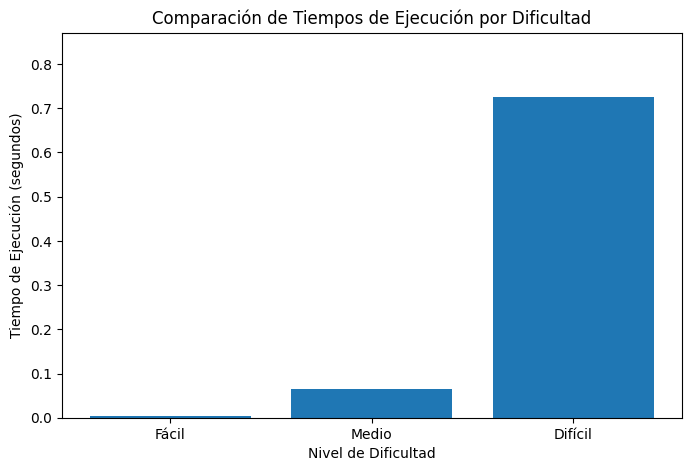

In [18]:
dificultades = ["Fácil", "Medio", "Difícil"]
tiempos = [0.0041, 0.0639, 0.7258]  # Tiempos de ejecución en segundos

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(dificultades, tiempos)
plt.title("Comparación de Tiempos de Ejecución por Dificultad")
plt.xlabel("Nivel de Dificultad")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.ylim(0, max(tiempos) * 1.2)  # Ajustar el límite superior
plt.show()


Podemos notar que el algoritmo tiene una eficiencia excelente si se trata de tableros de Sudoku de nivel medio o fácil, tomandole mas tiempo resolver los complejos debido a que los retrocesos y la mayor cantidad de casillas vacias, hace que se dificulte la resolución.

A continuación haremos una comparación entre las 3 tecnicas restantes para mostrar como se desempeñan resolviendo el sudoku

Programación dinamica

In [21]:
def dynamic_sudoku_solver(board):
    """
    Resuelve el Sudoku utilizando programación dinámica.
    """
    # Crear un conjunto de posibles valores para cada celda vacía
    possible_values = [[set(range(1, 10)) if board[i][j] == 0 else set()
                        for j in range(9)] for i in range(9)]

    # Inicializar los posibles valores según las restricciones
    for row in range(9):
        for col in range(9):
            if board[row][col] != 0:
                update_possibilities(board, possible_values, row, col, board[row][col])

    # Resolver usando el conjunto de posibilidades
    return fill_with_dynamic(board, possible_values)

def update_possibilities(board, possible_values, row, col, num):
    """
    Actualiza los posibles valores de las celdas afectadas por `num`.
    """
    for i in range(9):
        possible_values[row][i].discard(num)
        possible_values[i][col].discard(num)
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            possible_values[i][j].discard(num)

def fill_with_dynamic(board, possible_values):
    """
    Rellena el tablero utilizando los posibles valores.
    """
    min_options = 10
    min_pos = (-1, -1)
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0 and 0 < len(possible_values[row][col]) < min_options:
                min_options = len(possible_values[row][col])
                min_pos = (row, col)

    # Si no hay celdas vacías, el Sudoku está resuelto
    if min_pos == (-1, -1):
        return True

    # Si una celda no tiene opciones, no se puede resolver
    if min_options == 0:
        return False

    row, col = min_pos
    for num in possible_values[row][col]:
        board[row][col] = num
        # Copia el estado de los posibles valores
        backup = [row_set.copy() for row_set in possible_values[row]]
        update_possibilities(board, possible_values, row, col, num)
        if fill_with_dynamic(board, possible_values):
            return True
        # Si no funciona, revertir
        board[row][col] = 0
        possible_values[row] = backup
    return False


Algoritmos Voraces

In [22]:
def greedy_sudoku_solver(board):
    """
    Resuelve el Sudoku usando un enfoque voraz.
    """
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                # Intentar el primer número válido
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        break
                # Si no se encuentra un número válido, el Sudoku no se puede resolver
                if board[row][col] == 0:
                    return False
    return True


Divide y venceras

In [23]:
def is_valid_global(board, row, col, num):
    """
    Verifica si un número es válido en una celda considerando
    las reglas globales del Sudoku.
    """
    # Verificar la fila
    for i in range(9):
        if board[row][i] == num:
            return False

    # Verificar la columna
    for i in range(9):
        if board[i][col] == num:
            return False

    # Verificar el subcuadrante 3x3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False

    return True


def solve_block(board, start_row, start_col):
    """
    Resuelve un bloque 3x3 específico.
    """
    for row in range(start_row, start_row + 3):
        for col in range(start_col, start_col + 3):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid_global(board, row, col, num):
                        board[row][col] = num
                        if solve_block(board, start_row, start_col):
                            return True
                        board[row][col] = 0
                return False
    return True


def solve_sudoku_divide_and_conquer(board):
    """
    Divide el tablero en bloques 3x3 y resuelve cada bloque recursivamente.
    """
    for start_row in range(0, 9, 3):
        for start_col in range(0, 9, 3):
            if not solve_block(board, start_row, start_col):
                return False
    return True

Comparación de tiempos de ejecución y resultados

In [24]:
def compare_algorithms_without_backtracking(board):
    import copy
    import time

    results = {}

    # Programación Dinámica
    start_time = time.time()
    dynamic_board = copy.deepcopy(board)
    try:
        dynamic_result = dynamic_sudoku_solver(dynamic_board)
    except Exception:
        dynamic_result = False
    results['Programación Dinámica'] = {
        'Solved': dynamic_result,
        'Time': time.time() - start_time,
        'Board': dynamic_board if dynamic_result else None
    }

    # Algoritmo Voraz
    start_time = time.time()
    greedy_board = copy.deepcopy(board)
    greedy_result = greedy_sudoku_solver(greedy_board)
    results['Algoritmo Voraz'] = {
        'Solved': greedy_result,
        'Time': time.time() - start_time,
        'Board': greedy_board if greedy_result else None
    }

    # Divide y Vencerás
    start_time = time.time()
    divide_board = copy.deepcopy(board)
    divide_result = solve_sudoku_divide_and_conquer(divide_board)
    results['Divide y Vencerás'] = {
        'Solved': divide_result,
        'Time': time.time() - start_time,
        'Board': divide_board if divide_result else None
    }

    return results


# Tablero de prueba
sudoku_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# Comparar algoritmos sin backtracking
results = compare_algorithms_without_backtracking(sudoku_board)

# Imprimir resultados
for algo, data in results.items():
    print(f"{algo}:")
    print(f"  Resuelto: {'Sí' if data['Solved'] else 'No'}")
    print(f"  Tiempo: {data['Time']:.4f} segundos")
    if data['Solved']:
        print("  Tablero Resuelto:")
        print_board(data['Board'])
    print()


Programación Dinámica:
  Resuelto: Sí
  Tiempo: 0.0018 segundos
  Tablero Resuelto:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9



Algoritmo Voraz:
  Resuelto: No
  Tiempo: 0.0002 segundos

Divide y Vencerás:
  Resuelto: No
  Tiempo: 0.0008 segundos



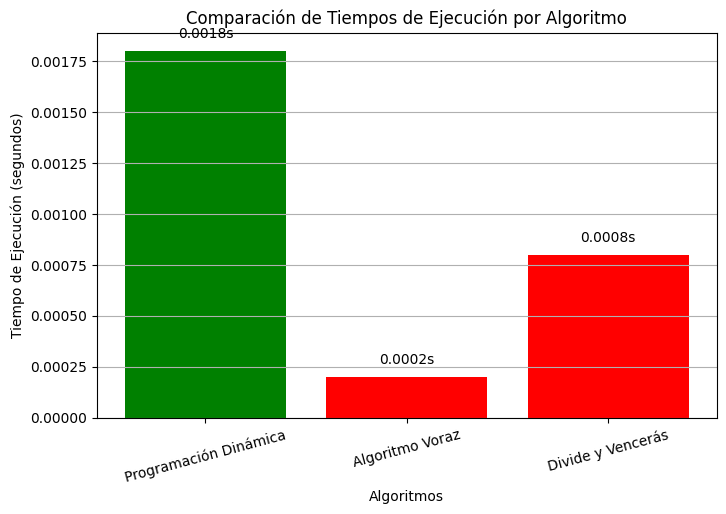

In [26]:
# Resultados de los algoritmos
algorithms = ['Programación Dinámica', 'Algoritmo Voraz', 'Divide y Vencerás']
times = [0.0018, 0.0002, 0.0008]  # Tiempos de ejecución en segundos
solved = [True, False, False]  # Indicador de éxito (resuelto o no)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(algorithms, times, color=['green' if s else 'red' for s in solved])
plt.xlabel('Algoritmos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos de Ejecución por Algoritmo')
plt.xticks(rotation=15)
plt.grid(axis='y')

# Mostrar resultado sobre cada barra
for i, time in enumerate(times):
    plt.text(i, time + 0.00005, f'{time:.4f}s', ha='center', va='bottom')

# Mostrar la gráfica
plt.show()


Como se observa en los resultados, la programación dinámica fue la única técnica que logró resolver el tablero de Sudoku. Esto se debe a su capacidad para reducir el espacio de búsqueda de manera eficiente, lo que permitió resolver el tablero en un tiempo muy corto (0.0018 segundos). No obstante, como se mencionó previamente en el documento, esta técnica es solo parcialmente adecuada para resolver Sudokus, ya que carece de la capacidad de retroceder en caso de errores. Este resultado confirma su efectividad para tableros sencillos que no requieren correcciones, como el utilizado en esta prueba.

Por otro lado, las otras dos técnicas, algoritmo voraz y divide y vencerás, no lograron resolver el tablero. El algoritmo voraz, aunque fue el más rápido (0.0002 segundos), no pudo manejar las restricciones futuras del tablero ni corregir decisiones incorrectas, lo que resultó en un fallo. En cuanto a divide y vencerás, su principal limitación radica en que no logra trabajar de manera efectiva con las restricciones globales del Sudoku, ya que las decisiones locales en los subcuadrantes no garantizan la validez del tablero completo.